### Projekt 1, mnożenie macirzy - Obliczenia wysokiej wydajności - Wykresy

In [190]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### Wczytywanie danych

In [191]:
file_name_1 = 'times.csv'
file_name_comm = 'times_comm.csv'
df = pd.read_csv(file_name_1)
df2 = pd.read_csv(file_name_comm)
df.head()

,processes,size,time
0,1,10,0.003338
1,1,10,0.003429
2,1,10,0.003329
3,1,10,0.003364
4,1,10,0.003326


#### Rysowanie histogramu dla wybranych parametrów

In [192]:
def plot_histogram(_df,proc,size,bins):
    """
    Funkcja rysuje histogramy dla danych czasów wykonania.
    """
    df = _df.loc[(_df["processes"] == proc) & (_df["size"] == size )]

    plt.figure(figsize=(10, 6))

    plt.hist(df["time"], bins=bins)

    plt.xlabel('Czas wykonania (s)')
    plt.ylabel('Liczba prób')
    plt.title('Histogram czasów wykonania dla różnych liczby procesów')

    plt.grid(True)
    plt.show()


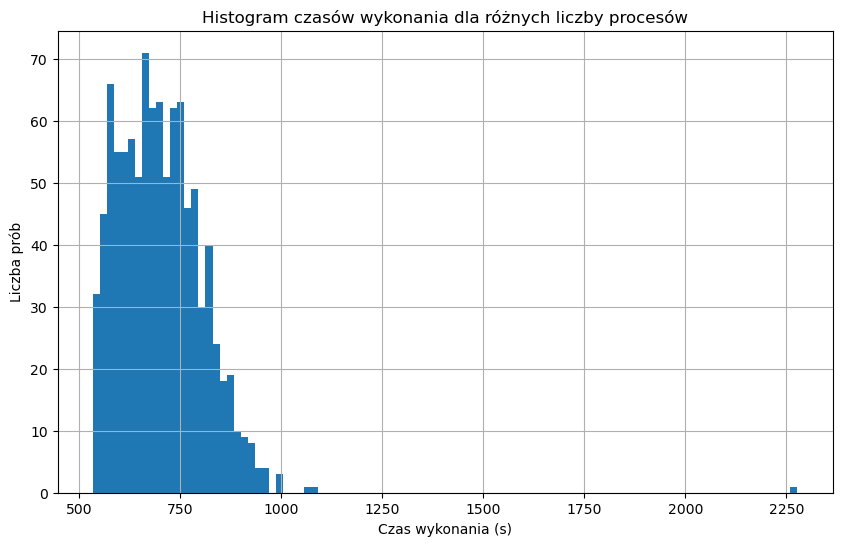

In [193]:
plot_histogram(df,32,1000,100)

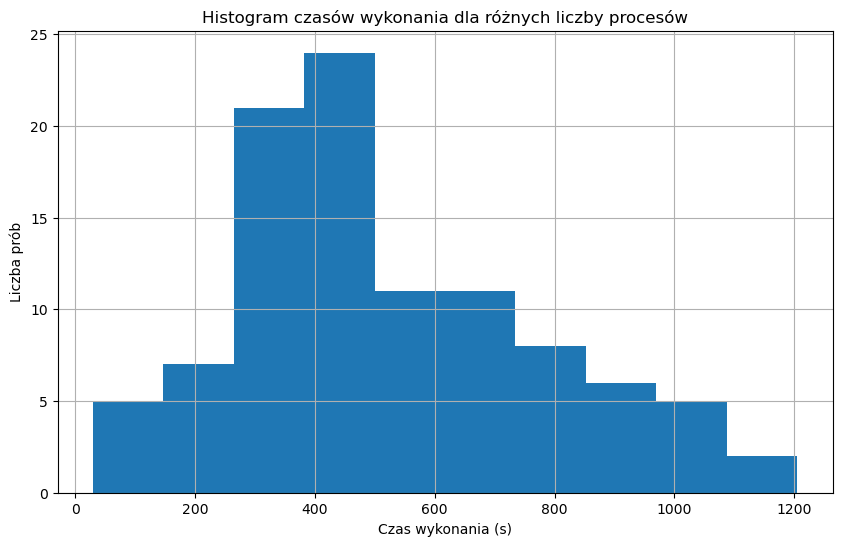

In [194]:
plot_histogram(df2,32,1000,10)

#### Obliczenie przyśpieszenia i efektywności ortodox

In [195]:
grouped = df.groupby(['processes','size'])['time'].agg(['mean', 'median']).reset_index()

time_mean_ortodox = grouped[grouped['processes'] == 1][['size', 'mean']].rename(columns={'mean': 'time_mean_ortodox'})

grouped = grouped.merge(time_mean_ortodox, on='size', how='left')

grouped['speedup_ort'] = grouped['time_mean_ortodox'] / grouped['mean']

grouped['efficiency_ort'] = grouped['speedup_ort'] / grouped['processes']



#### Wykres przyśpieszenia od ilości wykrzystanych rdzeni.

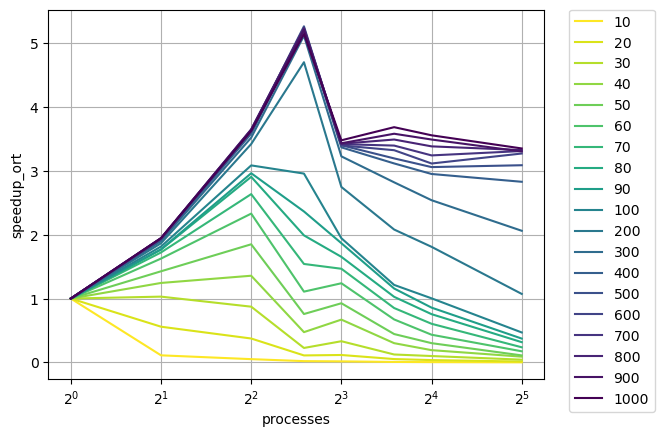

In [196]:
filtered_df_ortodox = grouped[grouped['processes'] >= 1]

data2=filtered_df_ortodox[filtered_df_ortodox["size"]>=100]
data1=filtered_df_ortodox[filtered_df_ortodox["size"]<100]


sns.lineplot(data = data1, x="processes", y="speedup_ort", hue = "size",hue_norm=(10,190), legend="full",palette="viridis_r")
sns.lineplot(data = data2, x="processes", y="speedup_ort", hue = "size",hue_norm=(-1000,1000),legend="full",palette="viridis_r")
# plt.yscale('log')

plt.xscale('log',base=2)
plt.grid("on")

plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)

In [197]:
max(filtered_df_ortodox["speedup_ort"])

5.257658830305885

#### Wykres efektywności

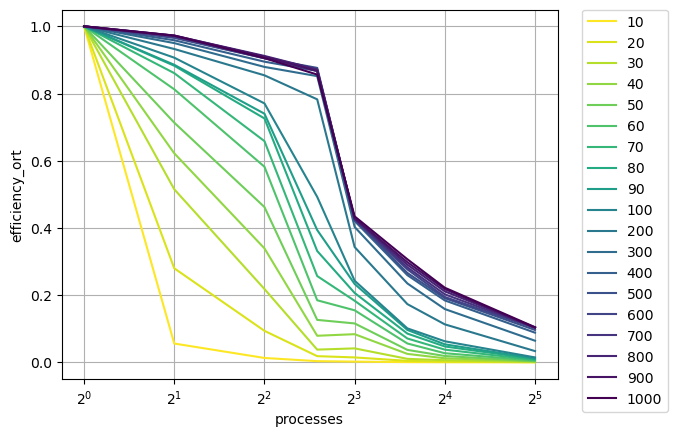

In [198]:
filtered_df_ortodox = grouped[grouped['processes'] >= 1]

data2=filtered_df_ortodox[filtered_df_ortodox["size"]>=100]
data1=filtered_df_ortodox[filtered_df_ortodox["size"]<100]


sns.lineplot(data = data1, x="processes", y="efficiency_ort", hue = "size",hue_norm=(10,190), legend="full",palette="viridis_r")
sns.lineplot(data = data2, x="processes", y="efficiency_ort", hue = "size",hue_norm=(-1000,1000),legend="full",palette="viridis_r")
# plt.yscale('log')

plt.xscale('log',base=2)
plt.grid("on")

plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)

#### Wykres przyśpieszenia od wielkości macierzy

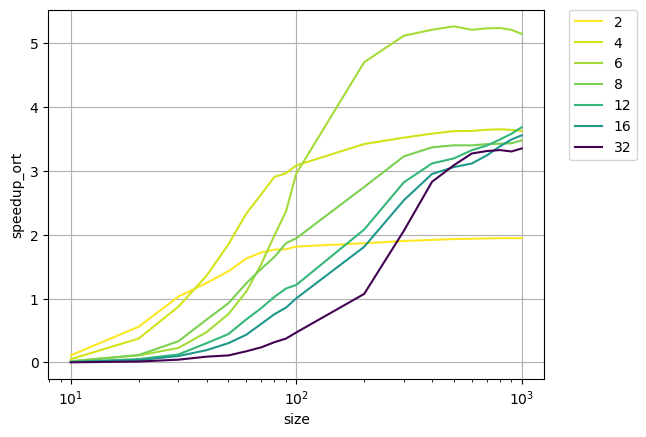

In [199]:
filtered_df_ortodox = grouped[grouped['processes'] > 1]
# filtered_df_ortodox['processes'] = filtered_df_ortodox['processes'].astype(str)

sns.lineplot(data=filtered_df_ortodox, x="size", y="speedup_ort", hue = "processes",palette="viridis_r",legend="full")
# plt.yscale('log')
plt.xscale('log')
plt.grid("on")

plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)

#### Obliczenie przyśpieszenia i efektywności silnych

In [200]:
time_mean_strong = grouped[grouped['processes'] == -1][['size', 'median']].rename(columns={'median': 'time_mean_strong'})

grouped = grouped.merge(time_mean_strong, on='size', how='left')

grouped['speedup_str'] = grouped['time_mean_strong'] / grouped['median']
grouped['efficiency_str'] = grouped['speedup_str'] / grouped['processes']


#### Wykres przyśpieszenia od ilości wykrzystanych rdzeni.

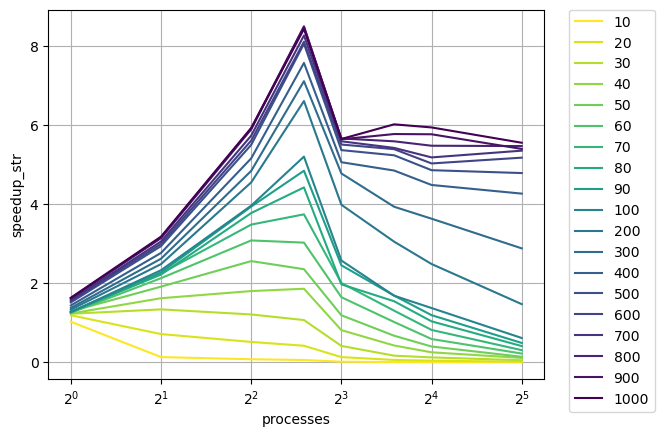

In [201]:
filtered_df_strong = grouped[grouped['processes'] >= 1]
# filtered_df['size'] = filtered_df['size'].astype(str)

data2=filtered_df_strong[filtered_df_strong["size"]>=100]
data1=filtered_df_strong[filtered_df_strong["size"]<100]


sns.lineplot(data = data1, x="processes", y="speedup_str", hue = "size",hue_norm=(10,190), legend="full",palette="viridis_r")
sns.lineplot(data = data2, x="processes", y="speedup_str", hue = "size",hue_norm=(-1000,1000),legend="full",palette="viridis_r")
# plt.yscale('log')

plt.xscale('log',base=2)
plt.grid("on")

plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)

#### Wykres efektywności

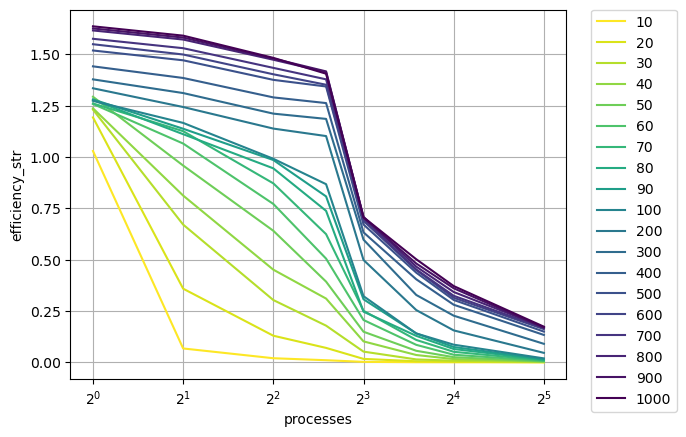

In [202]:
filtered_df_strong = grouped[grouped['processes'] >= 1]
# filtered_df['size'] = filtered_df['size'].astype(str)

data2=filtered_df_strong[filtered_df_strong["size"]>=100]
data1=filtered_df_strong[filtered_df_strong["size"]<100]


sns.lineplot(data = data1, x="processes", y="efficiency_str", hue = "size",hue_norm=(10,190), legend="full",palette="viridis_r")
sns.lineplot(data = data2, x="processes", y="efficiency_str", hue = "size",hue_norm=(-1000,1000),legend="full",palette="viridis_r")
# plt.yscale('log')

plt.xscale('log',base=2)
plt.grid("on")

plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)

#### Wykres przyśpieszenia od wielkości macierzy

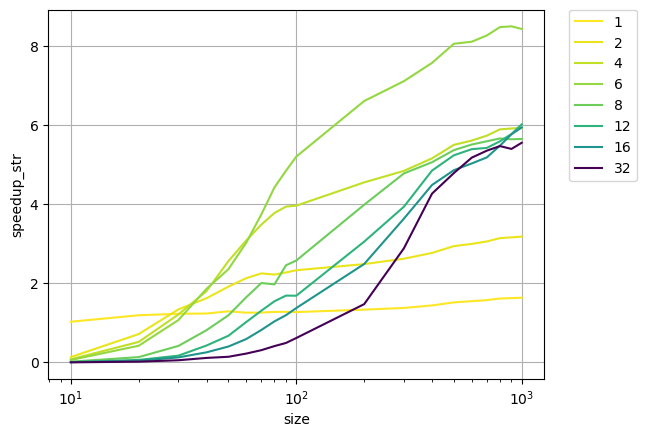

In [203]:
filtered_df_strong = grouped[grouped['processes'] >= 1]
# filtered_df['size'] = filtered_df['size'].astype(str)

sns.lineplot(data=filtered_df_strong, x="size", y="speedup_str", hue = "processes",palette="viridis_r",legend="full")
# plt.yscale('log')
plt.xscale('log')
plt.grid("on")

plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)

In [224]:
grouped3 = grouped[grouped["processes"]>0].reset_index()
grouped2 = df2.groupby(['processes','size'])['time'].agg(['mean', 'median']).reset_index()

time_mean_communication = grouped2.rename(columns={'mean': 'time_mean_communication'})

grouped3 = grouped3.merge(time_mean_communication, on=['processes','size'],how='right')

# grouped['speedup_ort'] = grouped['time_mean_ortodox'] / grouped['mean']

grouped3['communication_ratio'] = grouped3['time_mean_communication'] / grouped3['mean']

grouped3.head()

,index,processes,size,mean,median_x,time_mean_ortodox,speedup_ort,efficiency_ort,time_mean_strong,speedup_str,efficiency_str,time_mean_communication,median_y,communication_ratio
0,38,1,10,0.003533,0.003341,0.003533,1.0,1.0,0.003440,1.029478,1.029478,0.000347,0.000315,0.098130
1,39,1,20,0.022828,0.021226,0.022828,1.0,1.0,0.025327,1.193206,1.193206,0.000353,0.000331,0.015451
2,40,1,30,0.071163,0.068731,0.071163,1.0,1.0,0.084609,1.231017,1.231017,0.000363,0.000338,0.005103
3,41,1,40,0.178331,0.171717,0.178331,1.0,1.0,0.212505,1.237530,1.237530,0.000361,0.000347,0.002022
4,42,1,50,0.314817,0.303993,0.314817,1.0,1.0,0.393281,1.293717,1.293717,0.000371,0.000361,0.001177


/tmp/ipykernel_671641/3024451935.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=filtered_df_strong, x="processes", y="mean",palette="viridis_r",label="mean time")


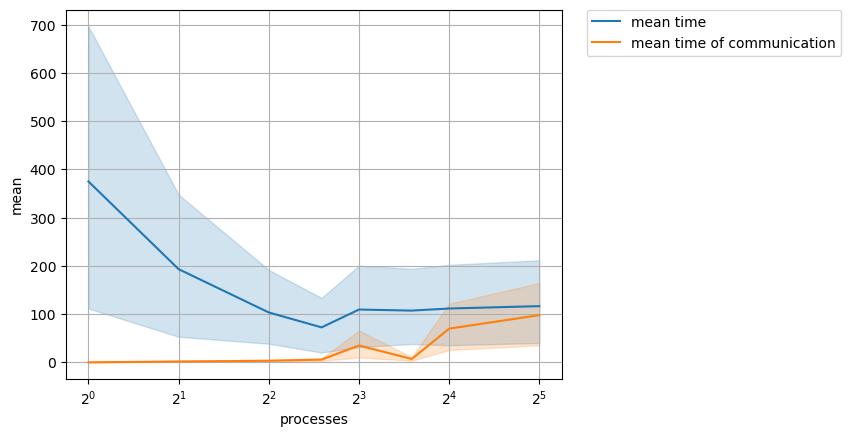

In [ ]:
filtered_df_strong = grouped3
# filtered_df['size'] = filtered_df['size'].astype(str)

sns.lineplot(data=filtered_df_strong, x="processes", y="mean",palette="viridis_r",label="mean time")
sns.lineplot(data=filtered_df_strong, x="processes", y="time_mean_communication",label="mean time of communication")
# plt.yscale('log')
plt.xscale('log',base=2)
plt.grid("on")

plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)

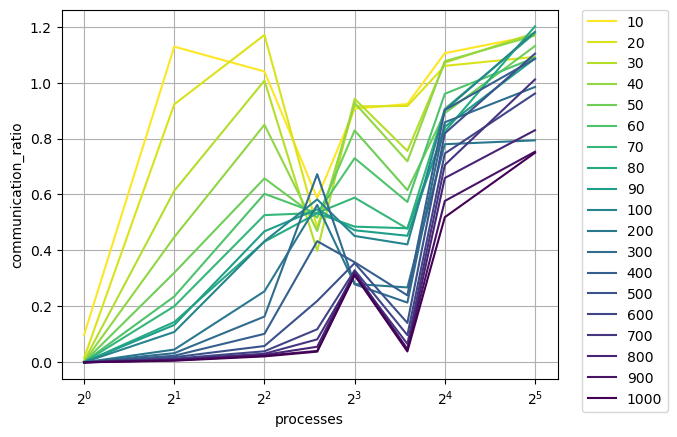

In [242]:
filtered_df_strong = grouped3
# filtered_df['size'] = filtered_df['size'].astype(str)

data2=filtered_df_strong[filtered_df_strong["size"]>=100]
data1=filtered_df_strong[filtered_df_strong["size"]<100]


sns.lineplot(data = data1, x="processes", y="communication_ratio", hue = "size",hue_norm=(10,190), legend="full",palette="viridis_r")
sns.lineplot(data = data2, x="processes", y="communication_ratio", hue = "size",hue_norm=(-1000,1000),legend="full",palette="viridis_r")

# plt.yscale('log')
plt.xscale('log',base=2)
plt.grid("on")

plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)

### Wnioski

1. **Parametry sprzętowe**  
   Pomiary wykonano na komputerze o następujących parametrach:  
   - **System**: Ubuntu LTS 24.4,  
   - **Procesor**: Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,  
   - **Rdzenie fizyczne**: 6,  
   - **Rdzenie logiczne**: 12,  
   - **RAM**: 32.0 GiB.  

   Na wykresach widać, że największe przyspieszenie uzyskano dla 6 wykorzystanych rdzeni, co jest zgodne ze specyfikacją procesora.

2. **Wpływ zrównoleglenia na wydajność dla małych macierzy**  
   - Dla niektórych rozmiarów macierzy zrównoleglenie spowalnia działanie programu.  
   - Przykładem jest macierz o rozmiarze 10x10, gdzie już przy wykorzystaniu 2 węzłów wykonanie równoległe okazuje się mniej efektywne niż sekwencyjne.  
   - Zjawisko to wynika prawdopodobnie z narzutu komunikacyjnego, który staje się bottleneckiem przy tak niewielkiej liczbie operacji.

3. **Wydajność dla dużych macierzy**  
   - Dla rozmiarów macierzy od około 600x600 w górę, charakterystyki przyspieszenia stabilizują się.  
   - Dla tej implementacji algorytmu mnożenia macierzy dalszy wzrost rozmiaru nie prowadzi do większego przyspieszenia.

4. **Ocena wyników przyśpieszenia ortodoksyjnego**  
   - Maksymalne uzyskane przyśpieszenie ortodoksyjne wyniosło **5.26**. Jest to wartość mieszcząca się w przedziale \((0, p]\), gdzie \(p\) to liczba procesorów, co świadczy o poprawności wyników.  
   - Efektywność ortodoksyjna nie przekracza wartości 1, co również wskazuje na prawidłowość obliczeń.


### Uwaga do wyznaczonego przyspieszenia silnego

1. **Nieoczekiwane wyniki**  
   - Wartość przyspieszenia silnego przewyższająca przyspieszenie ortodoksyjne jest nietypowa.  
   - Może to wskazywać, że zastosowany algorytm sekwencyjny:  
     - nie jest najlepszym znanym algorytmem dla mnożenia macierzy,  
     - lub został zaimplementowany w sposób nieoptymalny.  

2. **Efektywność przyspieszenia silnego**  
   - Efektywność wyliczona na podstawie przyspieszenia silnego wynosi więcej niż 1, co również sugeruje nieprawidłowości.

3. **Wpływ ustawień biblioteki Eigen**  
   - Algorytm mnożenia macierzy z biblioteki *Eigen* domyślnie wykorzystuje obliczenia równoległe.  
   - Wyłączenie równoległości mogło znacząco obniżyć wydajność algorytmu w trybie sekwencyjnym, co wpłynęło na wyniki.  

4. **Rekomendacja**  
   - W celu poprawnego wyznaczenia przyspieszenia silnego należy wykorzystać lepszy algorytm sekwencyjny jako punkt odniesienia.
